# Pressure-quench based analysis
* and other MD runs

In [2]:
%load_ext autoreload
%autoreload 2

In [4]:
from ase.io.extxyz import read_xyz
import numpy as np
from ase.atoms import Atoms
from ase.io.formats import index2range
from ase.io.cfg import read_cfg
from io import StringIO, UnsupportedOperation
from mtp import *
import os
from matplotlib import pyplot as plt
from quippy.potential import Potential
import pickle
from Ge_analysis import *
from Ge_calculation import *
import matplotlib.pyplot as plt
from matscipy.rings import ring_statistics
from datetime import datetime
import pymatgen.ext.matproj as mp
import pymatgen.io.ase as pase
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from numpy.random import normal
from ase.io.extxyz import write_xyz
from ase.io.lammpsdata import write_lammps_data

In [5]:
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = [ 'Helvetica', 'Arial', 'FreeSans', 'DejaVu Sans' ]

plt.rcParams['axes.labelsize'] = 18
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15

plt.rcParams['legend.fontsize'] = 14
plt.rcParams['legend.title_fontsize'] = 14
plt.rcParams['legend.fancybox'] = False
plt.rcParams['legend.edgecolor'] = 'k'
plt.rcParams['legend.borderaxespad'] = 1.5

plt.rcParams['lines.linewidth'] = 3.0
plt.rcParams['axes.linewidth'] = 1.5

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 1.0
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 1.0

plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 1.0
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1.0

plt.rcParams["figure.autolayout"] = False

# Labelling

In [6]:
GAP_18_dir = '/u/vld/hert5155/jup_remote/Ge_od/Si_GAP_training/libAtoms-silicon-testing-framework-fc252cb/models/GAP'
os.chdir('/u/vld/hert5155/jup_remote/Ge_od/GAP_to_MTP')
GAP_18_pot = Potential(param_filename=GAP_18_dir+'/gp_iter6_sparse9k.xml', calc_args='local_gap_variance')

/u/vld/hert5155/ase/ase/calculators/calculator.py:507: FutureWarning: The keyword "ignore_bad_restart_file" is deprecated and will be removed in a future version of ASE.  Passing more than one positional argument to Calculator is also deprecated and will stop functioning in the future.  Please pass arguments by keyword (key=value) except optionally the "restart" keyword.
  warnings.warn(FutureWarning(


# Pressure-Quench MD analysis

In [ ]:
# id_u16_pMDs = [id_u16_1k, id_u16_1k_fw01, id_u16_1k_mqG18db, id_u16_1k_mpmqG18db]

d_pMDs = [d_u16_1k, d_u18_1k, d_u20_1k, d_u24_1k, d_u16_10k]

# id_ux_pMDs = [id_u12_1k_mq, id_u18_1k, id_u20_1k, id_u20_1k_fw01, 
#                 id_u20_1k_fw01_sw01, id_u20_1k_min1, id_u24_1k_fw01,
#     id_u22_1k]

run_10ks = [id_u12_10k, id_u16_fw01_10k, id_u16_10k, id_u16_mpmqG18db_10k,
            id_u20_fw01_10k, id_u24_fw01_10k, d_u20_10k]
#             , d_u24_10k]

In [6]:
d_pMD_paths = ['run_1000_PQ_u16_direct', 'run_1000_PQ_u18_direct',
              'run_1000_u20_direct', 'run_10k_u16_fw0.1_direct']#, 'run_1000_PQ_u24_direct']
d_pMD_labels = ['u16_direct', 'u18_direct', 'u20_direct',
                'u16_fw01_10k_direct']#, 'u24_direct']

d_pMDs = [MD_run(os.path.join('pressure_quench', d_pMD_paths[i]), label=d_pMD_labels[i]) 
          for i in range(len(d_pMD_paths))]

In [7]:
id_u16_pMD_paths = ['run_1000_PQ_u16_indirect', 'run_10k_u16_10k',
                    'run_1000_PQ_u16_fw0.1_indirect', 'run_1000_PQ_u16_mqG18db_indirect',
                    'run_1000_PQ_u16_mpmqG18db_indirect']
id_u16_pMD_labels = ['u16_indirect', 'u16_10k_indirect', 'u16_fw0.1',
                    'u16_mqG18db', 'u16_mpmqG18db']

id_u16_pMDs = [MD_run(os.path.join('pressure_quench', id_u16_pMD_paths[i]), label=id_u16_pMD_labels[i]) 
          for i in range(len(id_u16_pMD_paths))]

In [22]:
id_ux_pMD_paths = ['run_1000_PQ_u12_mqDB', 'run_1000_PQ_u18_indirect',
                    'run_1000_u20_indirect', 'run_1000_PQ_u20_fw0.1_indirect',
                    'run_1000_PQ_u20_fw0.1_sw0.1_indirect', 'run_1000_PQ_u20_m1.0_indirect',
                  'run_1000_PQ_u22_indirect', 'run_1000_PQ_u24_fw0.1_indirect']
id_ux_pMD_labels = ['u12_mq_only', 'u18_indirect', 'u20_indirect',
                    'u20_fw0.1', 'u20_fw0.1_sw0.1', 'u20_min1.0',
                   'u22_indirect', 'u24_fw0.1']

id_ux_pMDs = [MD_run(os.path.join('pressure_quench', id_ux_pMD_paths[i]), label=id_ux_pMD_labels[i]) 
          for i in range(len(id_ux_pMD_paths))]


Configs len 164 and index len 163 162000 do not match
MD probably crashed, attempting to trim configs list


In [37]:
#10ks
id_ux_10k_pMD_paths = ['run_10k_u16_fw0.1_indirect', 'run_10k_u12_indirect',
                    'run_10k_u16_mpmqG18db_indirect',
             id_ux_10k_pMD       'run_10k_u20_fw0.1_indirect', 'run_10k_u18_indirect', 'run_10k_u20_direct']
                  #'run_10k_u24_fw0.1_indirect']
id_ux_10k_pMD_labels = ['u16_fw01_10k_indirect', 'u12_10k_indirect', 'u16_mpmqG18db_10k_indirect',
                    'u20_fw01_10k_indirect', 'u18_10k_indirect', 'u20_10k_direct']# 'u24_fw01_10k_indirect']

id_ux_10k_pMDs = [MD_run(os.path.join('pressure_quench', id_ux_10k_pMD_paths[i]), label=id_ux_10k_pMD_labels[i]) 
          for i in range(len(id_ux_10k_pMD_paths))]

Configs len 222 and index len 221 220000 do not match
MD probably crashed, attempting to trim configs list


In [40]:
# read from xyz
u16_100k_md = MD_run('/u/vld/hert5155/jup_remote/Ge_od/GAP_to_MTP/pressure_quench/big_100k_u16_indirect', label='indirect_u16_100k')

In [41]:
# read from xyz
u16_fw01_100k = MD_run('pressure_quench/run_100k_u16_fw0.1_indirect', label='u16_fw0.1 indirect 100k')

In [44]:
d = [i for i in os.listdir('pressure_quench') if '_direct' in i]
k10 = [i for i in os.listdir('pressure_quench') if 'run' in i and '_10k' in i]
ind = [i for i in os.listdir('pressure_quench') if 'indirect' in i and '10k' not in i and '100k' not in i]
maxlen = max([len(i) for i in [d, k10, ind]])
d += ['']*15; k10 += ['']*15; ind += ['']*15

for i in range(maxlen):
    print('{:<25s}         {:<25s}        {:<25s}'.format(d[i], k10[i], ind[i]))
    
missing = [i for i in os.listdir('pressure_quench') if 'run' in i and 
           (i not in id_ux_10k_pMD_paths +  id_ux_pMD_paths + id_u16_pMD_paths + d_pMD_paths)]
print(('Missing from analysis lists:\n' + '{:<25s}\n'*len(missing)).format(*missing))

run_1000_PQ_u16_direct            run_10k_u12_indirect             run_1000_PQ_u16_fw0.1_indirect
run_1000_PQ_u18_direct            run_10k_u16_10k                  run_1000_PQ_u16_indirect 
run_1000_PQ_u24_direct            run_10k_u16_fw0.1_indirect        run_1000_PQ_u16_mpmqG18db_indirect
run_1000_u20_direct               run_10k_u16_mpmqG18db_indirect        run_1000_PQ_u16_mqG18db_indirect
run_1000_PQ_u20_direct            run_10k_u18_indirect             run_1000_PQ_u18_indirect 
run_10k_u20_direct                run_10k_u20_fw0.1_indirect        run_1000_PQ_u20_fw0.1_indirect
run_10k_u24_direct                run_10k_u24_fw0.1_indirect        run_1000_PQ_u20_m1.0_indirect
run_1000_PQ_u16_fw0.1_direct         SW_run_10k                       run_1000_PQ_u22_indirect 
run_10k_u16_fw0.1_direct          run_10k_u20_direct               run_1000_PQ_u24_fw0.1_indirect
                                  run_10k_u24_direct               run_1000_u20_indirect    
                        

In [167]:
d_u20_10k =  MD_run('pressure_quench/run_10k_u20_direct', label='u20_10k_direct')
# d_u24_10k =  MD_run('pressure_quench/run_10k_u24_direct', label='u24_10k_direct')

IndexError: list index out of range

In [39]:
#Reference runs

sw_10k = MD_run('pressure_quench/SW_run_10k', label='sw 10k')
# GAP18_10k = MD_run()

In [ ]:
for i, val in enumerate([id_u16_pMDs, d_pMDs, id_ux_pMDs, u16_100k_md, id_ux_10k_pMDs]):
    with open('pressure_quench/pqMD_{}.pickle'.format(str(i)), 'wb') as f:
        pickle.dump(val, f)

In [ ]:
def save_to_xyz(MD_run):
    
    f = MD_run.rundir + '.xyz'
    with open(f, 'r') as file:
        tmp = list(read_xyz(file, index=slice(0,None))

In [45]:
# with open('pressure_quench/pqMD_0.pickle', 'rb') as f:
#     id_u16_pMDs = pickle.load(f)
# with open('pressure_quench/pqMD_1.pickle', 'rb') as f:
#     d_pMDs = pickle.load(f)
# with open('pressure_quench/pqMD_2.pickle', 'rb') as f:
#     id_ux_pMDs = pickle.load(f)
with open('pressure_quench/pqMD_3.pickle', 'rb') as f:
    u16_100k_md = pickle.load(f)
# with open('pressure_quench/pqMD_4.pickle', 'rb') as f:
#     id_ux_10k_pMDs = pickle.load(f)
    

## V/P and E/P curves

Look for the transitions and survival times

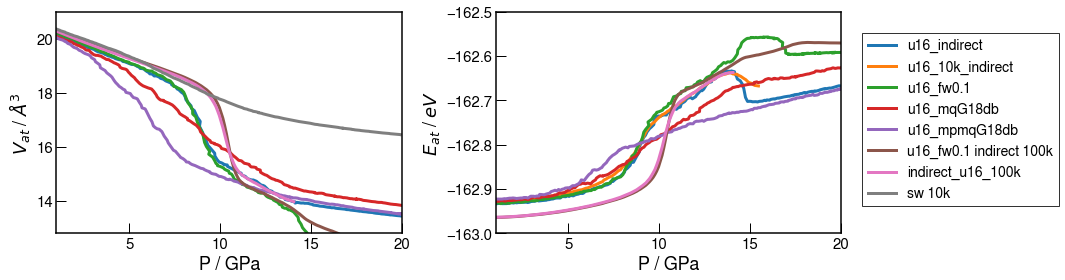

In [46]:
fig, axs = plt.subplots(1, 2, figsize=(12,4))

#for i, val in enumerate(pMDs):
for i, val in enumerate(id_u16_pMDs):
    axs[0].plot(val.dat[5]/1e4, val.dat[8]/1000, label=val.label)
    axs[1].plot(val.dat[5]/1e4, val.dat[6], label=val.label)

axs[0].plot(u16_fw01_100k.dat[5]/1e4, u16_fw01_100k.dat[8]/1e5, label=u16_fw01_100k.label)#, linestyle=linestyles[i])
axs[1].plot(u16_fw01_100k.dat[5]/1e4, u16_fw01_100k.dat[6], label=u16_fw01_100k.label)
axs[0].plot(u16_100k_md.dat[5]/1e4, u16_100k_md.dat[8]/1e5, label=u16_100k_md.label)#, linestyle=linestyles[i])
axs[1].plot(u16_100k_md.dat[5]/1e4, u16_100k_md.dat[6], label=u16_100k_md.label)
axs[0].plot(sw_10k.dat[5]/1e4, sw_10k.dat[8]/1e4, label=sw_10k.label)
axs[1].plot(sw_10k.dat[5]/1e4, sw_10k.dat[6], label=sw_10k.label)
axs[1].set(xlim=(1,20), ylim=(-163, -162.5), xlabel='P / GPa', ylabel=r'$E_{at}$ / $eV$')
axs[0].set(xlim=(1,20), ylim=(12.8,21), xlabel='P / GPa', ylabel=r'$V_{at}$ / $\AA^3$')
plt.tight_layout()
axs[1].legend(bbox_to_anchor=(1.0,1.0))

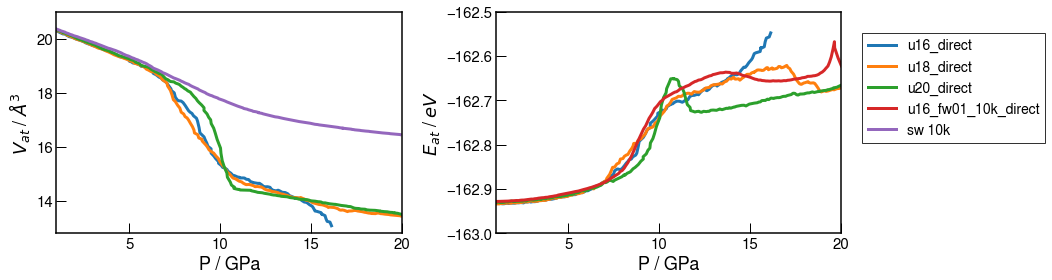

In [48]:
fig, axs = plt.subplots(1, 2, figsize=(12,4))

for i, val in enumerate(d_pMDs):
    axs[0].plot(val.dat[5]/1e4, val.dat[8]/1000, label=val.label)#, linestyle=linestyles[i])
    axs[1].plot(val.dat[5]/1e4, val.dat[6], label=val.label)

axs[0].plot(sw_10k.dat[5]/1e4, sw_10k.dat[8]/1e4, label=sw_10k.label)
axs[1].plot(sw_10k.dat[5]/1e4, sw_10k.dat[6], label=sw_10k.label)
axs[1].set(xlim=(1,20), ylim=(-163, -162.5), xlabel='P / GPa', ylabel=r'$E_{at}$ / $eV$')
axs[0].set(xlim=(1,20), ylim=(12.8,21), xlabel='P / GPa', ylabel=r'$V_{at}$ / $\AA^3$')
plt.tight_layout()
axs[1].legend(bbox_to_anchor=(1.0,1.0))

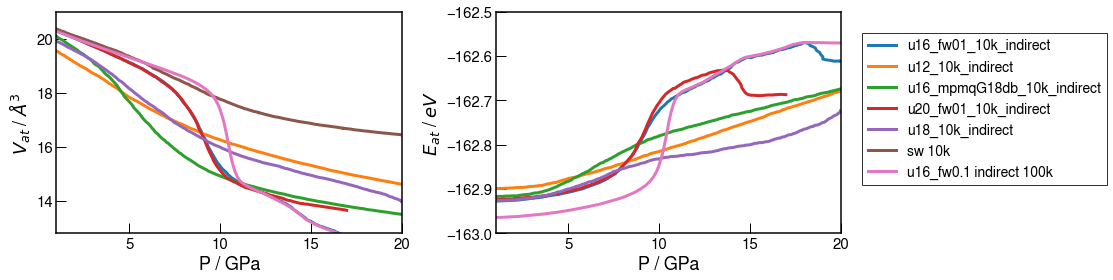

In [50]:
fig, axs = plt.subplots(1, 2, figsize=(12,4))

for i, val in enumerate(id_ux_10k_pMDs):
    axs[0].plot(val.dat[5]/1e4, val.dat[8]/1e4, label=val.label)#, linestyle=linestyles[i])
    axs[1].plot(val.dat[5]/1e4, val.dat[6], label=val.label)

axs[0].plot(sw_10k.dat[5]/1e4, sw_10k.dat[8]/1e4, label=sw_10k.label)
axs[1].plot(sw_10k.dat[5]/1e4, sw_10k.dat[6], label=sw_10k.label)
axs[0].plot(u16_fw01_100k.dat[5]/1e4, u16_fw01_100k.dat[8]/1e5, label=u16_fw01_100k.label)#, linestyle=linestyles[i])
axs[1].plot(u16_fw01_100k.dat[5]/1e4, u16_fw01_100k.dat[6], label=u16_fw01_100k.label)
axs[1].set(xlim=(1,20), ylim=(-163, -162.5), xlabel='P / GPa', ylabel=r'$E_{at}$ / $eV$')
axs[0].set(xlim=(1,20), ylim=(12.8,21), xlabel='P / GPa', ylabel=r'$V_{at}$ / $\AA^3$')
plt.tight_layout()
axs[1].legend(bbox_to_anchor=(1.0,1.0))

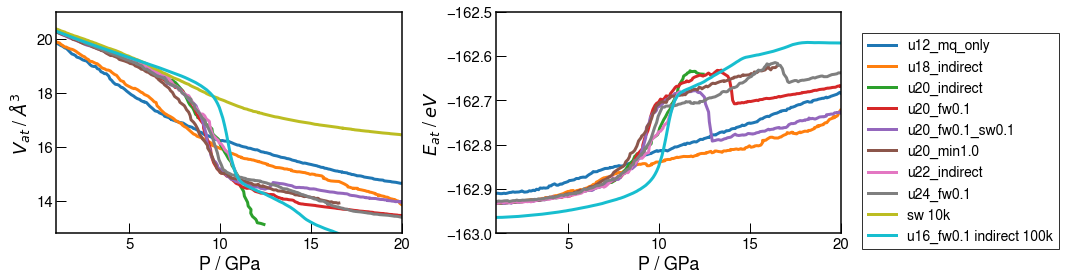

In [52]:
fig, axs = plt.subplots(1, 2, figsize=(12,4))

for i, val in enumerate(id_ux_pMDs):
    axs[0].plot(val.dat[5]/1e4, val.dat[8]/1e3, label=val.label)#, linestyle=linestyles[i])
    axs[1].plot(val.dat[5]/1e4, val.dat[6], label=val.label)

axs[0].plot(sw_10k.dat[5]/1e4, sw_10k.dat[8]/1e4, label=sw_10k.label)
axs[1].plot(sw_10k.dat[5]/1e4, sw_10k.dat[6], label=sw_10k.label)
axs[0].plot(u16_fw01_100k.dat[5]/1e4, u16_fw01_100k.dat[8]/1e5, label=u16_fw01_100k.label)#, linestyle=linestyles[i])
axs[1].plot(u16_fw01_100k.dat[5]/1e4, u16_fw01_100k.dat[6], label=u16_fw01_100k.label)
axs[1].set(xlim=(1,20), ylim=(-163, -162.5), xlabel='P / GPa', ylabel=r'$E_{at}$ / $eV$')
axs[0].set(xlim=(1,20), ylim=(12.8,21), xlabel='P / GPa', ylabel=r'$V_{at}$ / $\AA^3$')
plt.tight_layout()
axs[1].legend(bbox_to_anchor=(1.0,1.0))

## Coordination counting
saved to pickle after expensive ones

In [156]:
# calculate C.N. counts, per-atom-excess-s
# for j in pMDs:
#for j in pMDs:# + [u16_100k_md]:
#for j in id_u16_pMDs + d_pMDs + id_ux_pMDs + id_ux_10k_pMDs+ [sw_10k]:# + 
for j in [u16_fw01_100k] + [u16_100k_md]:
    
    if 'cn' not in j.df['Configs'][1000].info.keys():
        print('beg. {}'.format(j.label))
        for i, val in enumerate(j.df['Configs']):
            val.info['cn'], val.arrays['cn'] = cn_count(val)
        # for j in pMDs+[u16_100k_md]:
        #for j in [u16_100k_md]:
        for i, val in enumerate(j.df['Configs']):
            if i == 0:
                j.cn = np.array([val.info['cn']])
            else:
                j.cn = np.concatenate((j.cn, [val.info['cn']]), axis=0)


beg. u16_fw0.1 indirect 100k
beg. indirect_u16_100k


In [55]:
colormap = plt.get_cmap('plasma')

In [172]:
[(val.label, ct) for ct,val in enumerate(id_u16_pMDs)]

[('u16_indirect', 0),
 ('u16_fw0.1', 1),
 ('u16_mqG18db', 2),
 ('u16_mpmqG18db', 3)]

In [171]:
def cn_plot_two(r, blind=[False, False], mi=3, ma=9):

    colors = [colormap(i) for i in np.linspace(0, 0.95, ma - mi)]
    lens = [len(i.df['Configs'][i.df.index[0]]) for i in r]
    
    for i in range(ma, mi,-1):
        
        if not blind[0]:
            l1, = axs.plot(r[0].df['f_PressAve']/1e4, r[0].cn.T[i]/lens[0],
                     #label=str(i),
                     color=colors[i-4], linestyle=':')

        if not blind[1]:
            l2, = axs.plot(r[1].df['f_PressAve']/1e4, r[1].cn.T[i]/lens[1],
                     label=str(i),
                     color=colors[i-4], linestyle='-')
        
    plt.tight_layout()
    leg1 = axs.legend()
    if not blind[0] and not blind[1]:
        plt.legend([l1, l2], [i.label for i in r], bbox_to_anchor=(1.0, 0.6))
    axs.add_artist(leg1)
    
def cn_plot(r, axs, mi=3, ma=8, leg=False, xlim=(0,20), ylim=(-0.02,0.70)):

    colors = [colormap(i) for i in np.linspace(0, 0.95, ma+1 - mi)]
    lens = len(r.df['Configs'][r.df.index[0]])
    gma = np.sum(r.cn.T[ma+1:], axis=0)
    
    axs.plot(r.df['f_PressAve']/1e4, gma/lens,
                 label=r'$\geqslant$' + str(ma+1),
                 color=colors[ma+1-4], linestyle='-')
    for i in range(ma, mi,-1):
        l1, = axs.plot(r.df['f_PressAve']/1e4, r.cn.T[i]/lens,
                 label=str(i),
                 color=colors[i-4], linestyle='-')
        axs.set(xlim=xlim, ylim=ylim)
        
    plt.tight_layout()
    leg1 = axs.legend()
    
    axs.legend([l1], [r.label])
    
    if leg:
        axs.add_artist(leg1)
    
    #return fig, axs

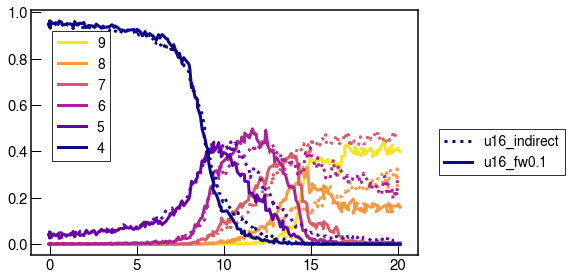

In [193]:
r = id_u16_pMDs[0:2]
cn_plot(r)

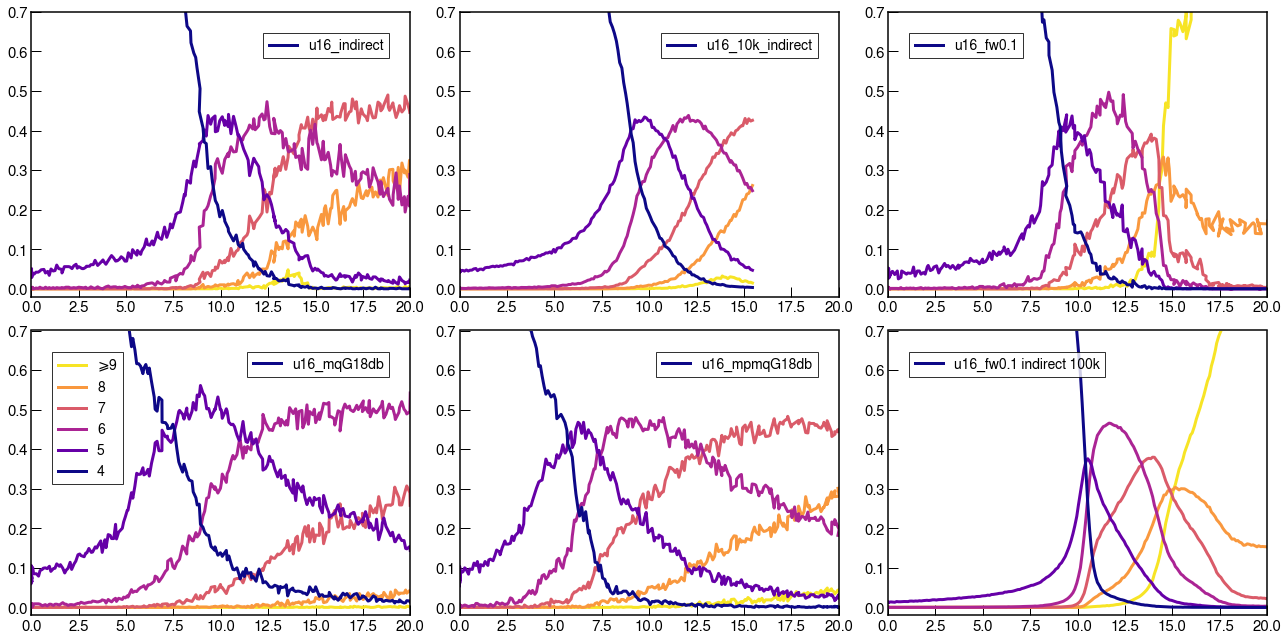

In [173]:
rs = id_u16_pMDs
fig, ax = plt.subplots(2,3, figsize=(18,9))
axs = ax.flatten()
legs = [False for i in range(len(rs))]; legs[3] = True
for j, val in enumerate(rs):                    
    cn_plot(val, axs[j], leg=legs[j])
cn_plot(u16_fw01_100k, axs[-1])

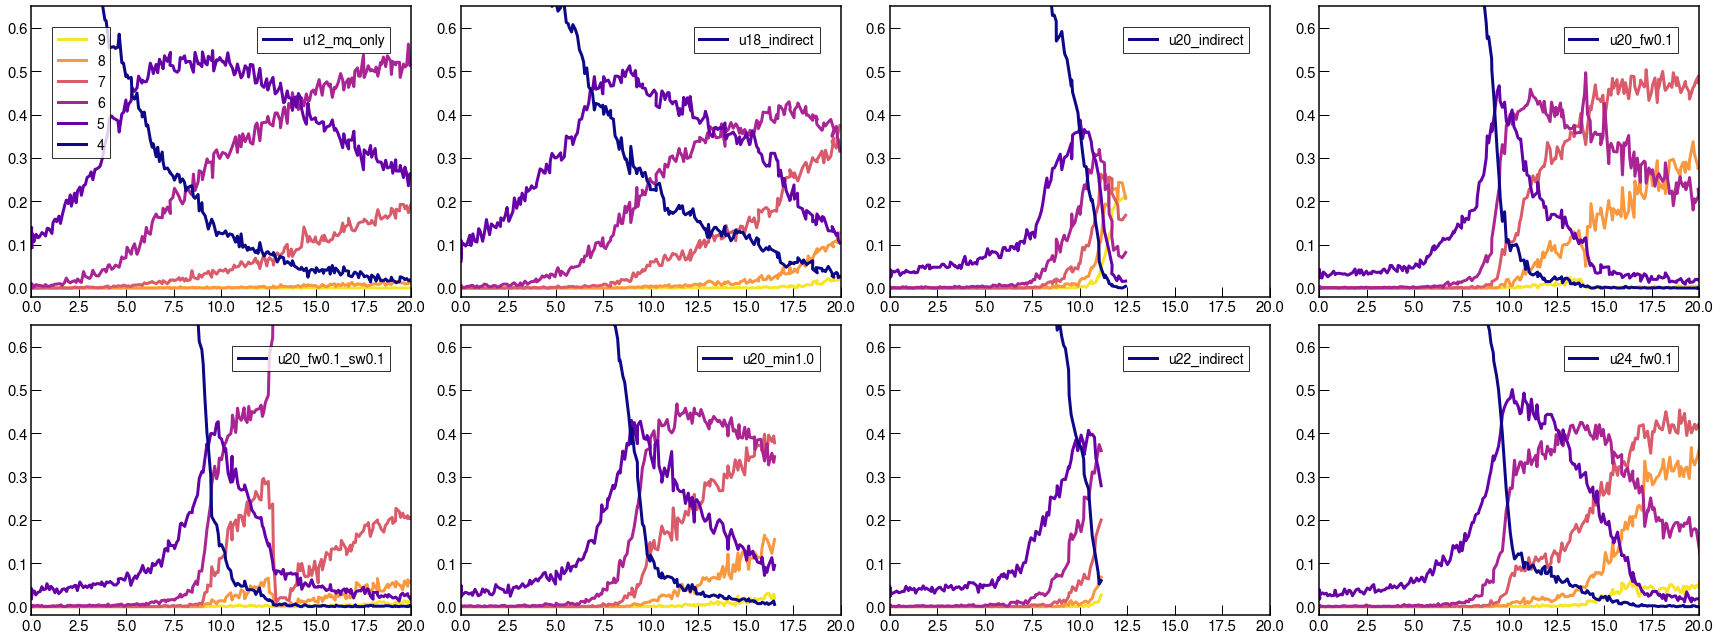

In [134]:
rs = id_ux_pMDs
fig, ax = plt.subplots(2,4, figsize=(24,9))
axs = ax.flatten()
legs = [False for i in range(len(rs))]; legs[0] = True
for j, val in enumerate(rs):                    
    cn_plot(val, axs[j], leg=legs[j])


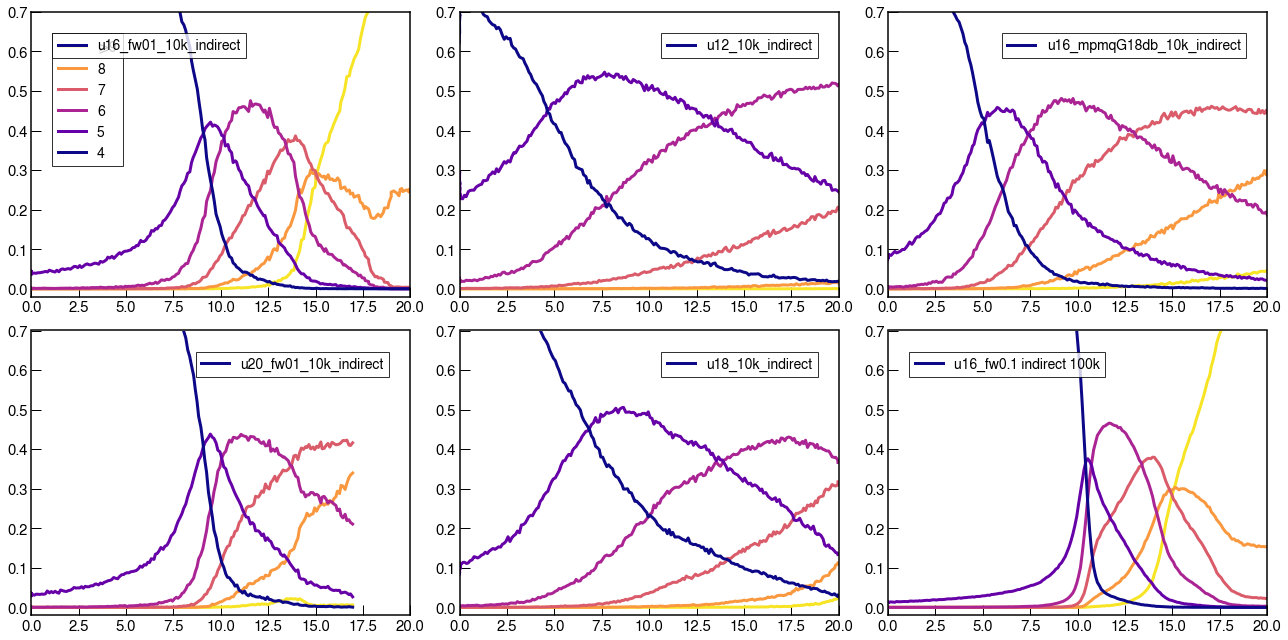

In [174]:
rs = id_ux_10k_pMDs
fig, ax = plt.subplots(2,3, figsize=(18,9))
axs = ax.flatten()
legs = [False for i in range(len(rs))]; legs[0] = True
for j, val in enumerate(rs):                    
    cn_plot(val, axs[j], leg=legs[j])
cn_plot(u16_fw01_100k, axs[-1])

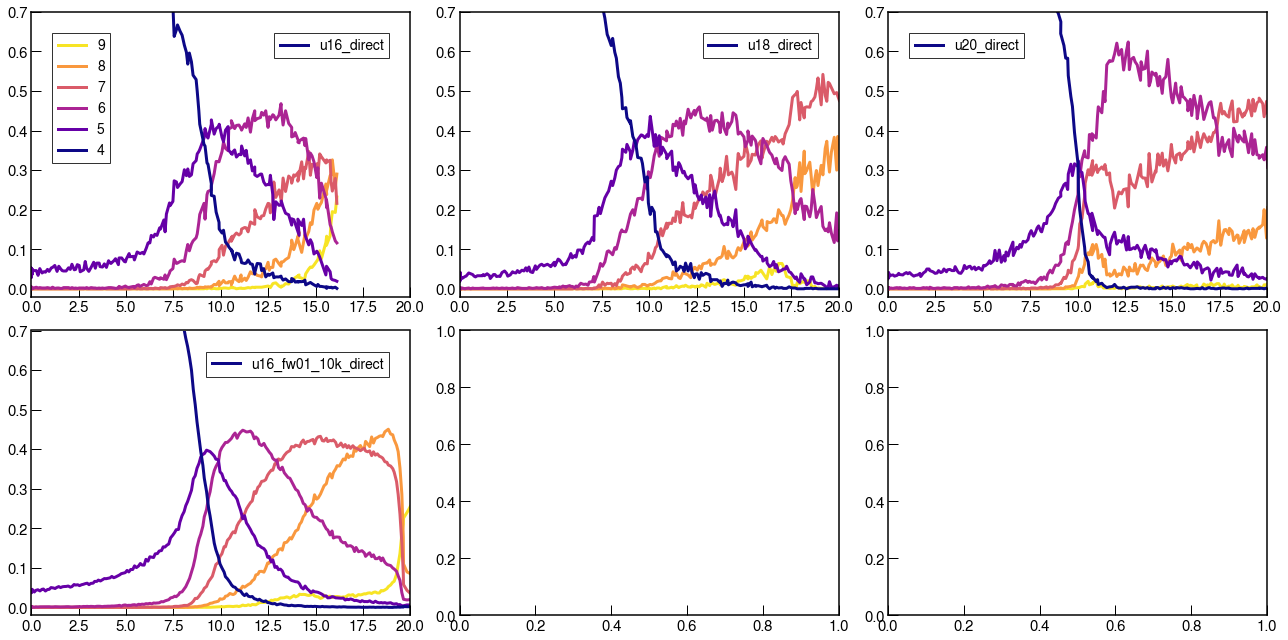

In [139]:
rs = d_pMDs
fig, ax = plt.subplots(2,3, figsize=(18,9))
axs = ax.flatten()
legs = [False for i in range(len(rs))]; legs[0] = True
for j, val in enumerate(rs):                    
    cn_plot(val, axs[j], leg=legs[j])

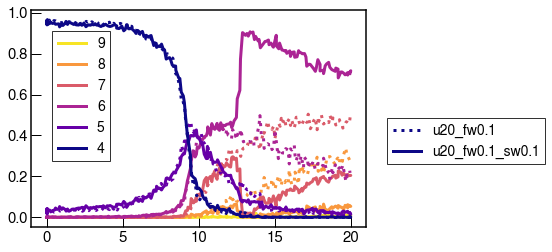

In [92]:
colors = [colormap(i) for i in np.linspace(0, 0.95, 6)]
fig, axs = plt.subplots()
runs = id_ux_pMDs[3:5]
for i in range(9,3,-1):
    l1, = axs.plot(runs[0].df['f_PressAve']/1e4, runs[0].cn.T[i]/1e3,
             #label=str(i),
             color=colors[i-4], linestyle=':')
    l2, = axs.plot(runs[1].df['f_PressAve']/1e4, runs[1].cn.T[i]/1e3,
             label=str(i),
             color=colors[i-4], linestyle='-')

leg1 = axs.legend()
plt.legend([l1, l2], [i.label for i in runs], bbox_to_anchor=(1.0, 0.6))
axs.add_artist(leg1)

In [61]:
def mod_vol(run, xtal_atoms):
    s = len(run.df['Configs'][run.df.index[0]])
    average_dens = s/np.average([i.get_volume() for i in run.df['Configs']])
    curr_dens = len(xtal_atoms)/xtal_atoms.get_volume()
    fac = curr_dens/average_dens
    
    xtal_atoms.set_cell(xtal_atoms.get_cell()*fac**(1/3), scale_atoms=True)

In [58]:
final_dens = id_u16_pMDs[0].df['Configs'][240000].get_volume()/1000

a = 2.65
sh = Atoms(hexagonal.Hexagonal(symbol='Si', latticeconstant={'a':a, 'c':a*0.957}))
dia = bulk('Si', crystalstructure='diamond', a=5.43,  cubic=True)
fcc = bulk('Si', crystalstructure='fcc', a=(final_dens*4)**(1/3), cubic=True)
bSn_fact = bSn_factory()
a = 5.2
bSn = Atoms(bSn_fact(symbol='Si', latticeconstant={'a':a, 'c':0.525*a}))

In [59]:
comps = [sh, dia, bSn, fcc]
kern_labels = ['sh', 'dia', 'bSn', 'fcc']

In [101]:
for i, val in enumerate(comps):
    run.df[kern_labels[i]] = kernel_compare(run.df['Configs'], val, similarity=True, average=True)
    print('{} done'.format(kern_labels[i]))
    

u20_fw0.1
sh done
dia done
bSn done
fcc done


In [64]:
for j in id_u16_pMDs + d_pMDs + id_ux_pMDs + id_ux_10k_pMDs+ [sw_10k]:# + [u16_fw01_100k]:# + [u16_100k_md]:
    
    if 'sh' not in j.df['Configs'][1000].info.keys():
        print('beg. {}'.format(j.label))
        
        for i, val in enumerate(comps):
            mod_vol(j, val)
            j.df[kern_labels[i]] = kernel_compare(j.df['Configs'], val, similarity=True, average=True)
            print('{} done'.format(kern_labels[i]))
            for k in j.df.index:
                j.df['Configs'][k].info[kern_labels[i]] = j.df[kern_labels[i]][k] 

#         for i, val in enumerate(comps):
#             aw = kernel_compare(j.df['Configs'], val, similarity=True, average=False)
#             print('aw {} done'.format(kern_labels[i]))
#             for ct,k in enumerate(j.df.index):
#                 j.df['Configs'][k].arrays[kern_labels[i]+'_aw'] = aw[ct]

beg. u16_fw0.1
sh done
dia done
bSn done
fcc done
beg. u16_mqG18db
sh done
dia done
bSn done
fcc done
beg. u16_mpmqG18db
sh done
dia done
bSn done
fcc done
beg. u16_direct
sh done
dia done
bSn done
fcc done
beg. u18_direct
sh done
dia done
bSn done
fcc done
beg. u20_direct
sh done
dia done
bSn done
fcc done
beg. u16_fw01_10k_direct
sh done
dia done
bSn done
fcc done
beg. u12_mq_only
sh done
dia done
bSn done
fcc done
beg. u18_indirect
sh done
dia done
bSn done
fcc done
beg. u20_indirect
sh done
dia done
bSn done
fcc done
beg. u20_fw0.1
sh done
dia done
bSn done
fcc done
beg. u20_fw0.1_sw0.1
sh done
dia done
bSn done
fcc done
beg. u20_min1.0
sh done
dia done
bSn done
fcc done
beg. u22_indirect
sh done
dia done
bSn done
fcc done
beg. u24_fw0.1
sh done
dia done
bSn done
fcc done
beg. u16_fw01_10k_indirect
sh done
dia done
bSn done
fcc done
beg. u12_10k_indirect
sh done
dia done
bSn done
fcc done
beg. u16_mpmqG18db_10k_indirect
sh done
dia done
bSn done
fcc done
beg. u20_fw01_10k_indirect


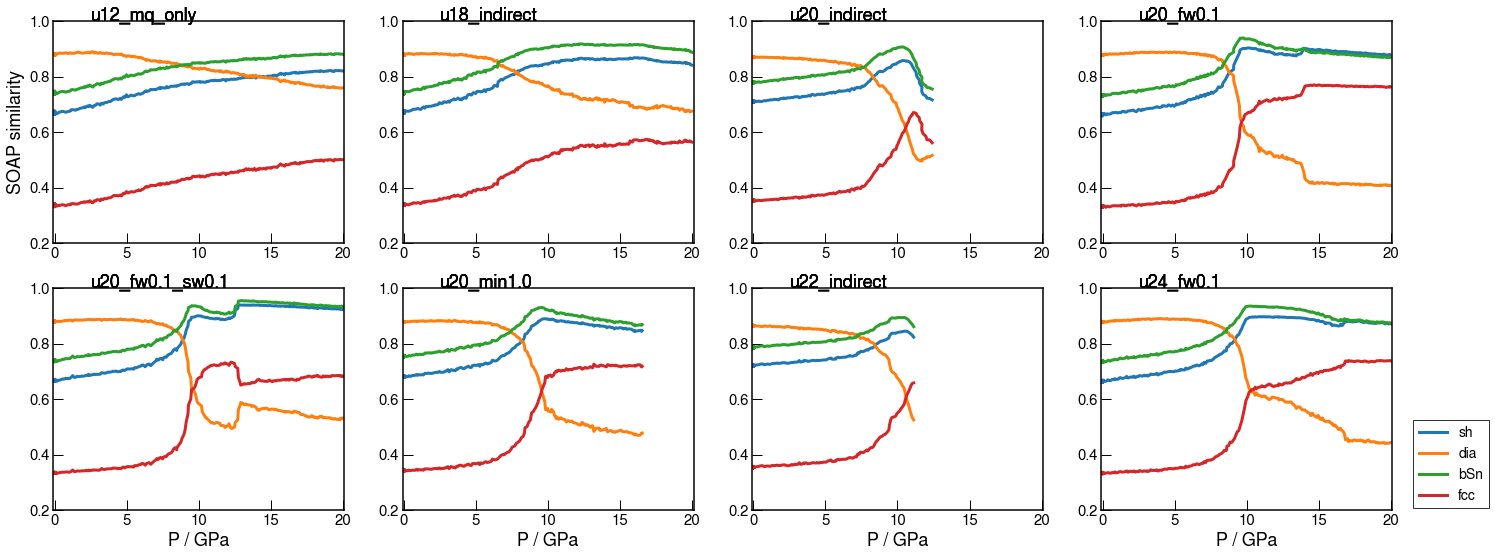

In [91]:
rs = id_ux_pMDs
fig, ax = plt.subplots(2,4, figsize=(24,9))
axs = ax.flatten()
for j, val in enumerate(rs):                    
    for i in kern_labels:
        axs[j].plot(val.df['f_PressAve']/1e4, val.df[i], label=i)
        axs[j].set(xlim=(-0.1,20.1), ylim=(0.2,1.0))
        if j>=len(axs)/2:
            axs[j].set(xlabel='P / GPa') 
        if j==0:
            axs[j].set(ylabel='SOAP similarity')
        axs[j].text(2.5, 1.0, val.label, fontsize=18)
axs[-1].legend(bbox_to_anchor=(1.0,0.5))

No handles with labels found to put in legend.


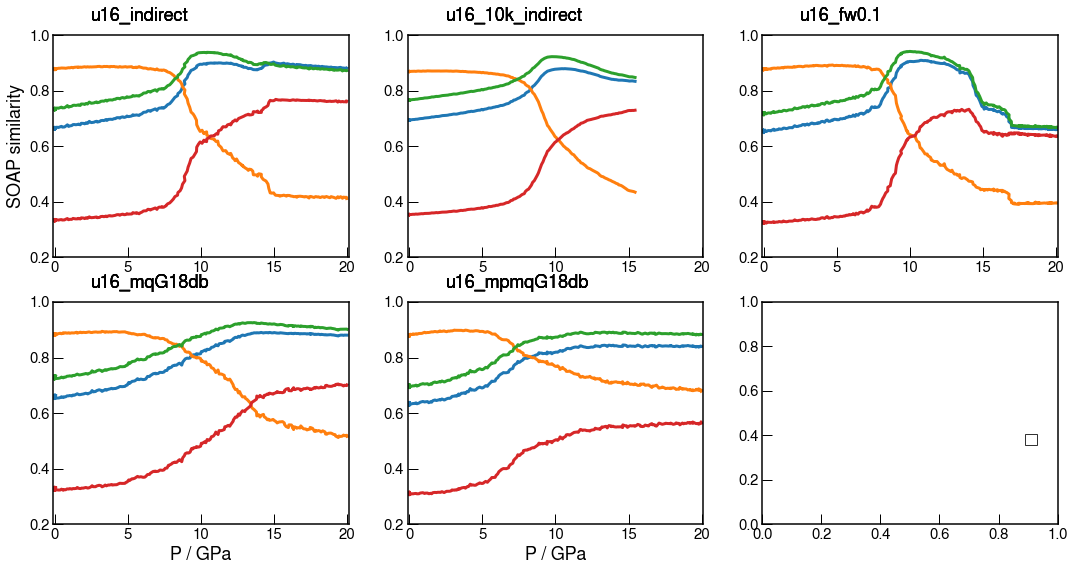

In [94]:
rs = id_u16_pMDs
fig, ax = plt.subplots(2,3, figsize=(18,9))
axs = ax.flatten()
for j, val in enumerate(rs):                    
    for i in kern_labels:
        axs[j].plot(val.df['f_PressAve']/1e4, val.df[i], label=i)
        axs[j].set(xlim=(-0.1,20.1), ylim=(0.2,1.0))
        if j>=len(axs)/2:
            axs[j].set(xlabel='P / GPa') 
        if j==0:
            axs[j].set(ylabel='SOAP similarity')
        axs[j].text(2.5, 1.05, val.label, fontsize=18)
axs[-1].legend(bbox_to_anchor=(1.0,0.5))

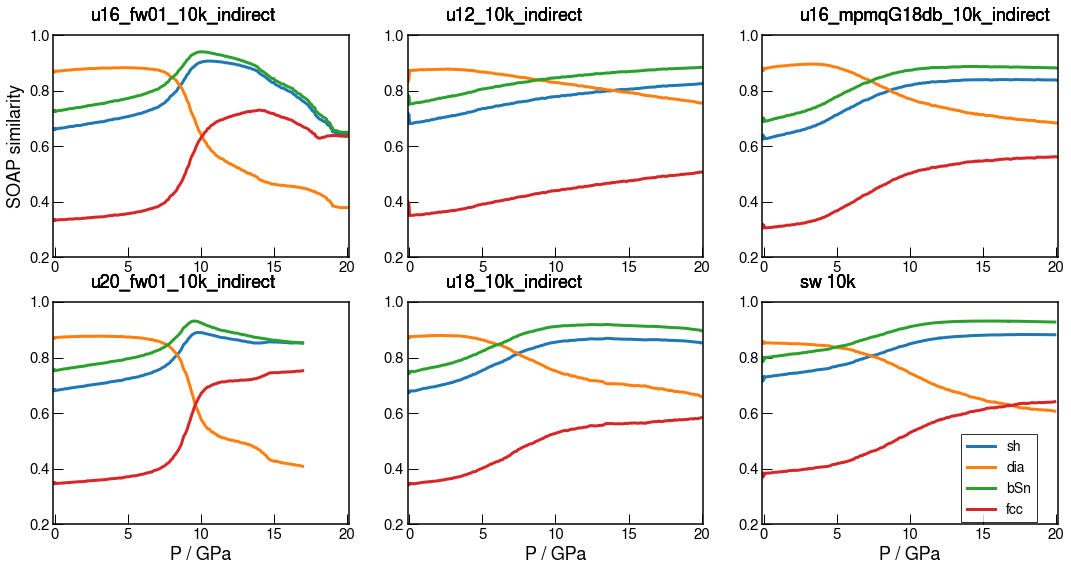

In [97]:
rs = id_ux_10k_pMDs + [sw_10k]
fig, ax = plt.subplots(2,3, figsize=(18,9))
axs = ax.flatten()
for j, val in enumerate(rs):                    
    for i in kern_labels:
        axs[j].plot(val.df['f_PressAve']/1e4, val.df[i], label=i)
        axs[j].set(xlim=(-0.1,20.1), ylim=(0.2,1.0))
        if j>=len(axs)/2:
            axs[j].set(xlabel='P / GPa') 
        if j==0:
            axs[j].set(ylabel='SOAP similarity')
        axs[j].text(2.5, 1.05, val.label, fontsize=18)
axs[-1].legend(bbox_to_anchor=(1.0,0.5))

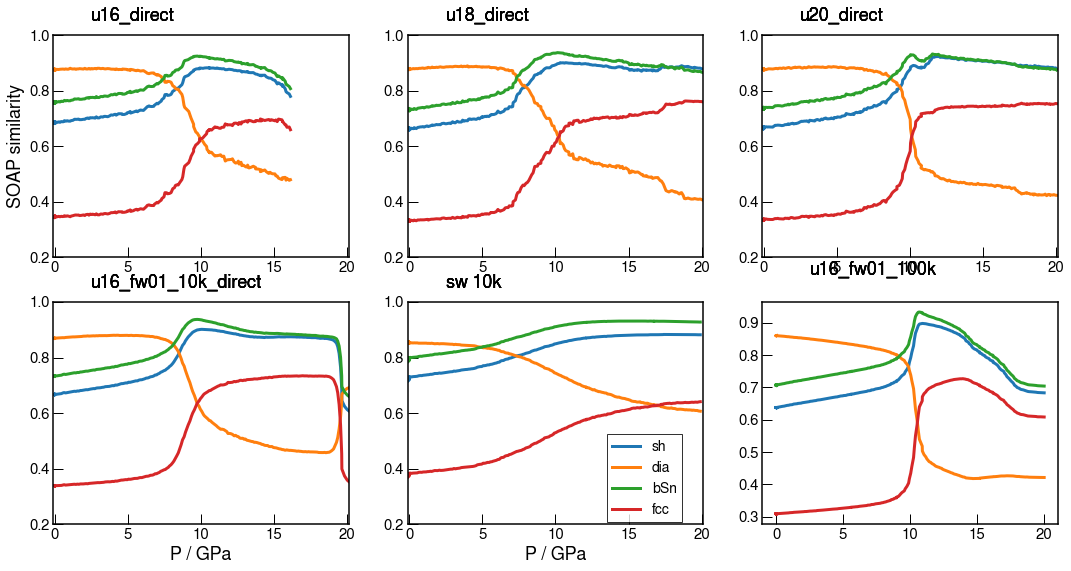

In [177]:
rs = d_pMDs + [sw_10k]
fig, ax = plt.subplots(2,3, figsize=(18,9))
axs = ax.flatten()
for j, val in enumerate(rs):                    
    for i in kern_labels:
        axs[j].plot(val.df['f_PressAve']/1e4, val.df[i], label=i)
        axs[j].set(xlim=(-0.1,20.1), ylim=(0.2,1.0))
        if j>=len(axs)/2:
            axs[j].set(xlabel='P / GPa') 
        if j==0:
            axs[j].set(ylabel='SOAP similarity')
        axs[j].text(2.5, 1.05, val.label, fontsize=18)
axs[-2].legend(bbox_to_anchor=(1.0,0.5))

for i in range(len(kern_labels)):
    axs[-1].plot(rs[1].df['f_PressAve']/1e4, kern_data[i], label='u16_fw01_100k')
    axs[-1].text(2.5, 1.05, 'u16_fw01_100k', fontsize=18)

In [148]:
with open('pressure_quench/run_100k_u16_fw0.1_indirect.xyz', 'r') as f:
    u16_fw01_100k_xyz = list(read_xyz(f, index=slice(0,None)))

In [151]:
d = u16_fw01_100k_xyz
kern_data = [[i.info[j] for i in d] for j in kern_labels]

In [153]:
kern_data

[[0.6366183019038912,
  0.6379276629042727,
  0.6376911925055414,
  0.6379763733209475,
  0.637613467339013,
  0.6380193472331804,
  0.6378351837918889,
  0.6377526088731005,
  0.6376177657583961,
  0.6378482077886075,
  0.6379748429154043,
  0.6376983313211668,
  0.637447332856972,
  0.6379621998256237,
  0.6379821725177692,
  0.6377657603741347,
  0.6379242161987333,
  0.6376819246004501,
  0.637345440177589,
  0.6376959123950586,
  0.6377542526631951,
  0.6377383450919979,
  0.6378265977824414,
  0.6374023429197886,
  0.6375060462517825,
  0.6375762173893336,
  0.6378876387557597,
  0.6376262873264099,
  0.6376364151485179,
  0.6378578078269549,
  0.63801724112265,
  0.637671990934927,
  0.6377636917695226,
  0.637594826694178,
  0.6378573612481894,
  0.6374742099977465,
  0.6377785932323106,
  0.637889041511375,
  0.6375326868449468,
  0.6374522453131103,
  0.6376535846394484,
  0.6376652798484783,
  0.6372736109593402,
  0.637451399211439,
  0.6375724706104023,
  0.637681280296346

In [20]:
sh_kern_atomwise = kernel_compare(id_u16_1k.df['Configs'], sh, similarity=True, average=False)

(251, 1000, 547) (547,)


In [8]:
from ase import Atoms
from ase.io.trajectory import Trajectory
from ase.io import read
from ase.units import kJ
from ase.eos import EquationOfState, birchmurnaghan
from scipy.optimize import root
from copy import deepcopy

In [9]:
import time, sys

# update_progress() : Displays or updates a console progress bar
## Accepts a float between 0 and 1. Any int will be converted to a float.
## A value under 0 represents a 'halt'.
## A value at 1 or bigger represents 100%
def update_progress(progress):
    barLength = 30 # Modify this to change the length of the progress bar
    status = ""
    if isinstance(progress, int):
        progress = float(progress)
    if not isinstance(progress, float):
        progress = 0
        status = "error: progress var must be float\r\n"
    if progress < 0:
        progress = 0
        status = "Halt...\r\n"
    if progress >= 1:
        progress = 1
        status = "Done...\r\n"
    block = int(round(barLength*progress))
    text = "\rPercent: [{0}] {1:5.2f}% {2}".format( "#"*block + "-"*(barLength-block), progress*100, status)
    sys.stdout.write(text)
    sys.stdout.flush()

In [34]:
calc = MTP('MTPs/u16_min1.5/GAP_18_db_GAPlabelled.mtp', potential_name='id_u16_1k', mtp_command='/u/vld/hert5155/mlip-2/bin/mlp')

In [10]:
def BM_p(v, v0, b0, bp):
    return 3*b0/2 * ( (v0/v)**(7/3) - (v0/v)**(5/3) ) * ( 1 + 3/4*(bp-4)*((v0/v)**(2/3) - 1) )

def V_p_BM(P, xtal, calc, traj_name='tmp', n=20):
    xtal.set_calculator(None)
    at = deepcopy(xtal)
    at.set_calculator(calc)
    cell = at.get_cell()
    traj = Trajectory('{}.traj'.format(traj_name), 'w')
    
    for x in np.linspace(0.95, 1.05, n):
        at.set_cell(cell * x, scale_atoms=True)
        at.get_potential_energy()
        traj.write(at)
        
    configs = read('{}.traj@0:{}'.format(traj_name, n))  # read configurations
    # Extract volumes and energies:
    volumes = [i.get_volume() for i in configs]
    energies = [i.get_potential_energy() for i in configs]
    eos = EquationOfState(volumes, energies, 'birchmurnaghan')
    v0, e0, B = eos.fit()
    BP = eos.eos_parameters[2]
#     print(B / kJ * 1.0e24, 'GPa')
#     eos.plot()
    
    if not isinstance(P, np.ndarray):
        try:
            P = np.array(P)
        except:
            raise TypeError('P must be a list or numpy array')
            
    p = P * kJ / 1.0e24 # convert to atomic units
    prev_v = xtal.get_volume()
#     print('initial volume guess: {:5.2f}'.format(prev_v))
    bm_volumes = []
    
    for i in p:
        sol = root(lambda vol: BM_p(vol, v0, B, BP) - i, prev_v)
        prev_v = sol.x[0]
#         print(sol.x)
        bm_volumes.append(sol.x[0])
    
    bm_volumes = np.array(bm_volumes)
    
    bm_energies = birchmurnaghan(bm_volumes, e0, B, BP, v0)
        
    return bm_volumes, bm_energies

In [11]:
def kernel_compare(cfgs, comp,
                         desc=None,
                         zeta=4, similarity=False, average=True):
    '''calculates the average/std dev similarity kernel between a set of
    configs and a reference (or set of references).
    '''
    if desc is None:
        desc_str = 'soap l_max=6 n_max=12 \
                   atom_sigma=0.5 cutoff=5.0 \
                   cutoff_transition_width=1.0 central_weight=1.0'
        if average:
            desc_str += ' average=T'
        else:
            desc_str += ' average=F'
    else:
        desc_str = desc
    desc = Descriptor(desc_str)
    
    if not isinstance(comp, list):
        comp = [comp]

    descs = np.array(desc.calc_descriptor(cfgs))
    comp_desc = np.array([i[0] for i in desc.calc_descriptor(comp)]) # currently only looks at first atom of xtal
#     print(descs.shape, comp_desc.shape)

    if similarity:
        k = np.einsum('ij,kj', descs, comp_desc)**zeta
    else:
        k = np.array(2 - 2*np.einsum('ij,j', descs, comp_desc)**zeta)


    return k.T

In [12]:
# cn and excess enthalpy included, read from and append to xyz (python spot path vs. file)

In [13]:
a = 2.65
sh = Atoms(hexagonal.Hexagonal(symbol='Si', latticeconstant={'a':a, 'c':a*0.957}))
dia = bulk('Si', crystalstructure='diamond', a=5.43,  cubic=True)
fcc = bulk('Si', crystalstructure='fcc', a=3.89, cubic=True)
bSn_fact = bSn_factory()
a = 4.8
bSn = Atoms(bSn_fact(symbol='Si', latticeconstant={'a':a, 'c':0.525*a}))

In [14]:
comps = [sh, bSn, dia, fcc]
comp_labels = ['sh', 'bSn', 'dia', 'fcc']

In [16]:
run = deepcopy(id_u16_pMDs[0])


In [36]:
run.pot = calc

In [21]:
vols = []; es = []

for i in comps:
    v, e = V_p_BM(run.df['f_PressAve']/1e4, i, GAP_18_pot)
    vols.append(v); es.append(e)
vols = np.array(vols)
es = np.array(es)

In [22]:
Hs = es + np.array(run.df['Press'].tolist())/160.2176 * vols
for i in range(len(Hs)):
    Hs[i] *= 1/len(comps[i])
    
base_H = [min(i) for i in Hs.T]

In [41]:
# calculate and add SOAP kernel information to 
# TODO: add squared exponential kernel to kernel_compare
# TODO: add calculation of extrapolation grade
fac = [vols[i]/comps[i].get_volume() for i in range(len(vols))]
job_size = len(run.df.index)
extra_pots = [run.pot]
properties = ['GAP18_energy'] # TODO: implement selective addition of data to existing xyz file upon further analysis

for i, ind in enumerate(run.df.index): # also write all MD_run data to xyz (need function for back-conversion)
    GAP_18_pot.calculate(run.df['Configs'][ind], properties=['energy', 'energies', 'forces', 'stress'],
                        args_str='local_gap_variance', copy_all_results=True)
    run.df['Configs'][ind].set_calculator(None)
    
    run.df['Configs'][ind].info['{}_energy'.format('GAP18')] = GAP_18_pot.results['energy']
    run.df['Configs'][ind].info['{}_virial'.format('GAP18')] = GAP_18_pot.results['stress']
    run.df['Configs'][ind].arrays['{}_force'.format('GAP18')] = GAP_18_pot.results['forces']
    run.df['Configs'][ind].arrays['{}_energies'.format('GAP18')] = GAP_18_pot.results['energies']
    run.df['Configs'][ind].arrays['{}_variance'.format('GAP18')] = GAP_18_pot.extra_results['atoms']['local_gap_variance']
    
    for j, val in enumerate(extra_pots):
        
        if not hasattr(val, 'name'):
            val.name = i
        
        val.calculate(run.df['Configs'][ind], properties=['energy', 'energies', 'forces', 'stress'])
            
        run.df['Configs'][ind].info['{}_energy'.format(val.name)] = val.results['energy']
        run.df['Configs'][ind].info['{}_virial'.format(val.name)] = val.results['stress']
        run.df['Configs'][ind].arrays['{}_force'.format(val.name)] = val.results['forces']
      #  run.df['Configs'][ind].arrays['{}_energies'.format(val.name)] = val.results['energies'] # not implemented
    
    update_progress(i/job_size)
    
    for j, val in enumerate(run.df.iloc[i][1:]):
        run.df['Configs'][ind].info[run.df.columns[j+1]] = val
    run.df['Configs'][ind].info['timestep'] = ind
    
    stable_xtal = np.argmin
    run.df['Configs'][ind].info['H_xs'] = GAP_18_pot.results['energy'] - base_H[i]
    run.df['Configs'][ind].arrays['H_xs'] = GAP_18_pot.results['energies'] - base_H[i]
    
    for c, cval in enumerate(comps):
        cval.set_cell(cval.get_cell()*fac[c][i]**(1/3), scale_atoms=True)
    
    kerns = kernel_compare(run.df['Configs'][ind],
                                              comps, similarity=True, average=True)
    for j, val in enumerate(kerns):
        run.df['Configs'][ind].info[comp_labels[j]] = val
        
        
    kerns = kernel_compare(run.df['Configs'][ind],
                                              comps, similarity=True, average=False)
    for j, val in enumerate(kerns):
        run.df['Configs'][ind].arrays[comp_labels[j]] = val
        
    update_progress((2*i+1)/(job_size*2))

for j, val in enumerate(comp_labels):
    run.df[val] = [struct.info[val] for struct in run.df['Configs']]
# add the H_exs etc. as well

Percent: [##############################] 98.33% 

In [43]:
if 'cn' not in run.df['Configs'][run.df.index[0]].info.keys():
    print('beg. cn counting')
    
    for i, val in enumerate(run.df['Configs']):
        val.info['cn'], val.arrays['cn'] = cn_count(val, r=2.7)

beg. cn counting


In [45]:
run.write('{}.xyz'.format(run.label))

103.26273066903741 GPa
58.06079999999998
[61.49726613]
[58.86396282]
[54.9778711]
[53.46251956]


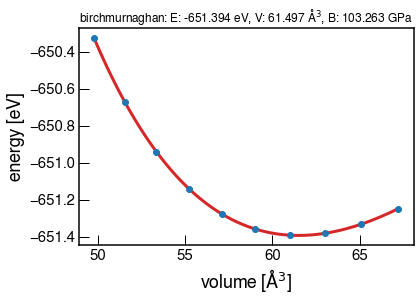

In [289]:
mod_vol_BM(np.array([0, 5, 15, 20]), bSn, GAP_18_pot)

array([59.00806507, 55.4661953 , 49.06183779, 45.65618383])

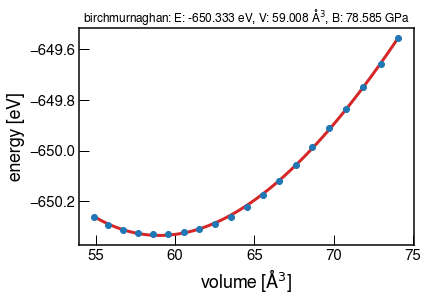

In [25]:
V_p_BM(np.array([0, 5, 15, 20]), fcc, GAP_18_pot)

88.46907869556217 GPa
160.10300699999996
[162.86953474]
[154.81318263]
[143.18510616]
[138.72125664]


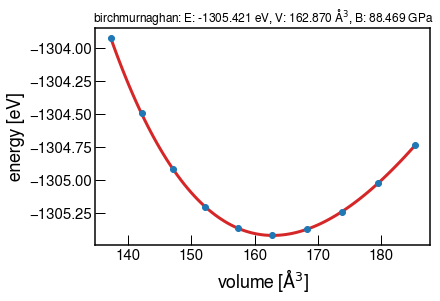

In [291]:
V_p_BM(np.array([0, 5, 15, 20]), dia, GAP_18_pot)

In [253]:
run = id_ux_pMDs[6]
comps = [sh]
     

In [17]:
    #, dia, bSn, fcc]
kern_labels = ['sh_aw']
for i, val in enumerate(comps):
    #run.df[kern_labels[i]] = kernel_compare(run.df['Configs'], val, similarity=True, average=False)
    sh_aw = kernel_compare(run.df['Configs'], val, similarity=True, average=False)
    print('{} done'.format(labels[i]))

240 ps done


In [254]:
run.df[kern_labels[0]+'_aw'] = sh_aw

ValueError: Wrong number of items passed 1000, placement implies 1

In [255]:
len(sh_aw[0])

1000

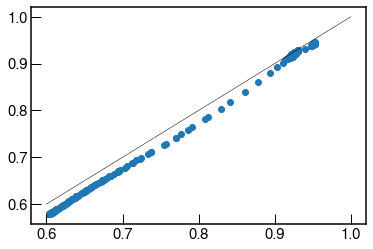

In [22]:
fig, axs = plt.subplots()

axs.plot(x := np.linspace(0.6, 1.0, 10), x, color='k', linewidth=0.5)
axs.scatter(run.df['sh'], sh_aw.mean(axis=1))

[Text(0.5, 0, 'P / GPa'), Text(0, 0.5, 'SOAP variability')]

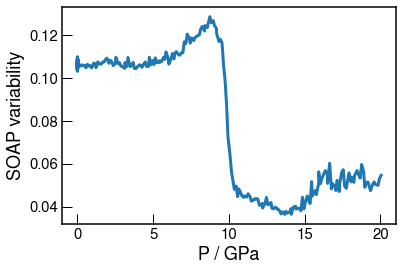

In [23]:
fig, axs = plt.subplots()

axs.plot(run.df['f_PressAve']/1e4, sh_aw.std(axis=1))
axs.set(xlabel='P / GPa', ylabel='SOAP variability')

In [34]:
for i, val in enumerate(id_u16_1k.df['Configs']):
    val.arrays['sh_kern'] = sh_kern_atomwise[i]

In [35]:
with open('id_u16_1k_MD.xyz', 'w') as f:
    id_u16_1k.write(f)


In [25]:
id_u16_1k.df['Configs']


1000      (Atom('Si', [1.31205964277, 2.21480765107, 2.2...
2000      (Atom('Si', [1.350547533, 1.9876970781, 2.2739...
3000      (Atom('Si', [1.21646937624, 1.8793367417600002...
4000      (Atom('Si', [1.28339391646, 1.8807236545400001...
5000      (Atom('Si', [1.23997392255, 1.9145247755700001...
                                ...                        
247000    (Atom('Si', [3.3369568739, 2.408821398, 3.8076...
248000    (Atom('Si', [3.4139680443000002, 2.3912548596,...
249000    (Atom('Si', [3.6040510662000003, 2.6833436742,...
250000    (Atom('Si', [3.4922629236, 2.2004663574, 3.859...
251000    (Atom('Si', [3.440154809, 2.437221413, 4.11972...
Name: Configs, Length: 251, dtype: object

## Enthalpy calculation
would be good to do excess: compare to sh or cd (not clear exactly when each is most stable phase - discontinuity 
issue)

In [67]:
nat = len(run.df['Configs'][1000])
Hs = []
for ct, val in enumerate(run.df.index):
#     val.set_calculator(pot)
    Hs.append(run.df['f_PEAve_Atom'][val] + 1/(1e4*160.2176621) * run.df['f_PressAve'][val] * run.df['f_vAve'][val]/nat)

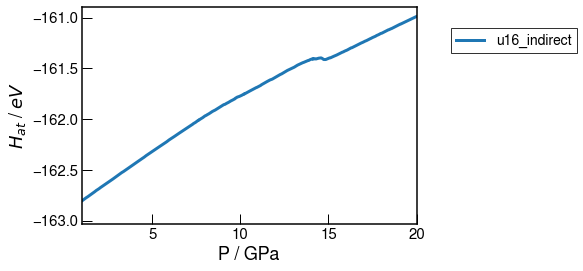

In [69]:
fig, axs = plt.subplots()

#for i, val in enumerate(pMDs):
for i, val in enumerate([run]):
    axs.plot(val.df['f_PressAve']/1e4, Hs, label=val.label)#, linestyle=linestyles[i])

# axs.plot(u16_100k_md.dat[5]/1e4, u16_100k_md.dat[6], label=u16_100k_md.label)#, linestyle=linestyles[i])
axs.set(xlim=(1,20), 
#         ylim=(-163, -162.5), 
        xlabel='P / GPa', ylabel=r'$H_{at}$ / $eV$')
axs.legend(bbox_to_anchor=(1.04,1.0))

In [58]:
#calculate the per-atom (excess) enthalpy
# 1 eV/Å3 = 160.2176621 GPa
run = id_u16_pMDs[0]

In [ ]:
   
    for i in range(len(p)):
        if i % opt_freq == 0:
            #val.set_constraint(FixAtoms(mask=[True for atom in val]))
            #uf = ExpCellFilter(val, scalar_pressure=pea[i], hydrostatic_strain=True)
            uf = ExpCellFilter(val, scalar_pressure=pea[i], hydrostatic_strain=True)
            opt = BFGS(uf, logfile='/dev/null')
            opt.run(0.05, steps=20)
            if not opt.converged():
                warnings.warn('Warning: {} did not converge at pressure {}'.format(
                                self.labels[ct],p[i]))
        v[j][ct][i] = (vt := val.get_volume()/len(val))
        H[j][ct][i] = val.get_potential_energy()/len(val) + pea[i]*vt

## Try loading the big u16



In [36]:
u16_100k_md.df['Configs'][1000]

Atoms(symbols='Si100000', pbc=True, cell=[127.153, 127.153, 127.153], masses=...)